# Project 4, APS1070 Winter 2023
#### **Linear Regression -  15 points**
**Deadline: April 3rd, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: 
*   Your **student number**: 

### How to submit **(HTML [This notebook] + IPYNB + GitHub [Part 6])**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.

7. Make sure you compeleted the last part on <font color='red'>**GitHub**</font> and added your link to the last cell here. The teaching team will view and grade your part 7 on GitHub.



Ref: https://stackoverflow.com/a/64487858 

Github: https://github.com/APS1070-W23/project-4-nureinumeya1999.git

## Part 1 - Getting Started [2 marks]

In this project, we are going to design a mathematical model that predicts the critical temperature of a superconductor, as described in the paper below:

*Hamidieh, Kam, A data-driven statistical model for predicting the critical temperature of a superconductor, Computational Materials Science, Volume 154, November 2018, Pages 346-354*

The following dataset contains 21263 instances, where each instance is a set of 81 features describing the superconductor's status. Our goal is to use these features to predict the `critical_temp` column, which is a setting that the design should take into account. We will make our predictions by implementing linear regression.

In [3]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/APS1070-W23/datasets/main/superconduct.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[1.5]**
*   Using `train_test_split` from Sklearn, split the dataset into training and validation sets ($80\%$ training, $20\%$ validation). When splitting, set `random_state=1`. **[0.5]**
*   Standardize the data **manually** according to the same method as `StandardScaler` from sklearn, but you may not directly use `StandardScaler'. **[0.5]**
*   Insert a first column of all $1$s in both the training and validation data sets. **[0.5]**
3. Explain why we should not insert the column of $1$s prior to standardization. **[0.5]**

In [4]:
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, :-1], df.iloc[:, [-1]]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

# standardization
X_train = (X_train - X_train.mean()) / X_train.std()
X_val = (X_val - X_val.mean()) / X_val.std()

# insert ones-column
X_train.insert(0, 'ones', [1 for _ in range(len(X_train))])
X_val.insert(0, 'ones', [1 for _ in range(len(X_val))])


>>> The ones have to be inserted afterward since otherwise standardizing would result in an error, given the standard deviation of that column is zero. 

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the inversion, as numpy.linalg.inv may caue an error.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [5]:
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.linalg import inv

def lin_reg(x: np.ndarray, y: np.ndarray) -> np.ndarray:
    '''
    Returns the weights.
    x: Samples
    y: Labels
    '''
    W = inv(x.T@x) @ (x.T@y)
    return W


X_train_numpy, y_train_numpy = X_train.to_numpy(), y_train.to_numpy()
X_val_numpy, y_val_numpy = X_val.to_numpy(), y_val.to_numpy()

W = lin_reg(X_train_numpy, y_train_numpy)
train_RMSE = mean_squared_error(y_true=y_train_numpy, y_pred=X_train_numpy@W, squared=False)
val_RMSE = mean_squared_error(y_true=y_val_numpy, y_pred=X_val_numpy@W, squared=False)

print(f"lin-reg weight: {lin_reg(X_train_numpy, y_train_numpy)}")
print(f"Train RMSE: {train_RMSE}, Val RMSE: {val_RMSE}")



lin-reg weight: [[ 3.43770008e+01]
 [-5.46388834e+00]
 [ 2.63492214e+01]
 [-3.27529232e+01]
 [-1.63274923e+01]
 [ 2.51819900e+01]
 [-1.36644524e+01]
 [ 1.40087621e+00]
 [ 1.16064715e+01]
 [ 1.21979416e+00]
 [-1.13002521e+01]
 [ 1.79809844e+00]
 [ 1.75373156e+01]
 [-3.62983361e+01]
 [-1.51241755e+01]
 [ 3.25672833e+01]
 [-4.92119334e+01]
 [ 1.44662503e+01]
 [ 2.22748791e+01]
 [ 4.86904038e+00]
 [-2.37617137e+01]
 [-1.01065148e+00]
 [-1.38303230e+01]
 [ 1.02443750e+02]
 [ 7.17091499e+00]
 [-1.12151877e+02]
 [ 3.33017526e+01]
 [ 1.88850679e+01]
 [ 1.31237204e+01]
 [-3.46258398e+00]
 [-6.97273269e+00]
 [-1.03873359e+01]
 [-1.45056631e+01]
 [ 2.92170678e-01]
 [ 5.57018575e+00]
 [ 8.42016781e+00]
 [ 5.45872113e+00]
 [-6.76723665e+00]
 [-5.83574191e+00]
 [-4.35509406e-01]
 [ 9.54676206e+00]
 [-2.30473728e+00]
 [-2.35189470e+00]
 [ 1.62542252e+01]
 [ 4.74584369e+00]
 [-1.76658678e+01]
 [ 1.29490512e+00]
 [-6.11333553e+00]
 [-2.19737155e+01]
 [-4.12624357e+00]
 [ 2.70611961e+01]
 [-1.09232172e+

## Part 3 - Full Batch Gradient Descent [3 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is
 $ w_t = w_{t-1} - \alpha g_t$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_{\text{Direct Solution}}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[1]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[1]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

In [198]:
import time

def train(X_train, X_val, y_train, y_val, print_every=1000):
    start_time = time.time() ## Records current time
    ALPHA = 0.01
    epoch = 1
    
    w = np.random.uniform(0, 0.001, (X_train.shape[1], 1))
    
 
    _val_RMSE = mean_squared_error(y_true=y_val, y_pred=X_val@w, squared=False)
    val_rmse_array = []
    train_rmse_array = []

    while _val_RMSE > val_RMSE * 1.001: 

        _train_RMSE = mean_squared_error(y_train, X_train @ w, squared=False)
        train_rmse_array.append(_train_RMSE)

        gradient = 1/(len(y_train) ) * (X_train.T @ (X_train @ w - y_train))
        w = w - ALPHA * gradient ### weight update

        _val_RMSE = mean_squared_error(y_true=y_val, y_pred=X_val@w, squared=False)
        val_rmse_array.append(_val_RMSE)

        if print_every != -1 and not epoch % print_every:
            print(f"Epoch: {epoch} {(8 - len(str(epoch)))  * ' ' }| "
                  + f"train_RMSE: {round(train_rmse_array[-1], 3)} {(8 - len(str(round(train_rmse_array[-1], 3))))  * ' '}| "
                  + f"val_RMSE: {round(_val_RMSE, 3)}")
        epoch += 1

    
    print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))
    return train_rmse_array, val_rmse_array

In [ ]:
train_rmse_array, val_rmse_array = train(X_train_numpy, X_val_numpy, y_train_numpy, y_val_numpy)

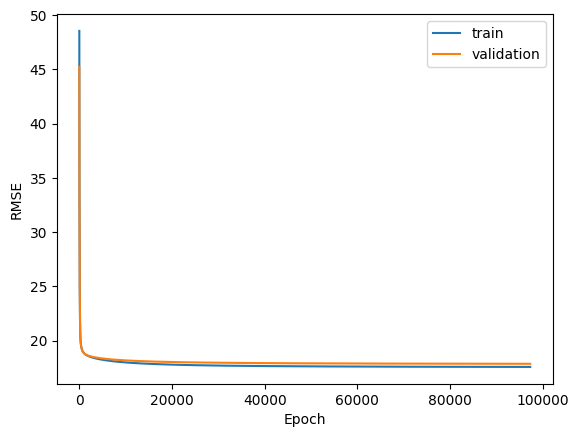

In [200]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(train_rmse_array) + 1), train_rmse_array, label='train')
plt.plot(range(1, len(train_rmse_array) + 1), val_rmse_array, label='validation')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend()
plt.show()
plt.close()

>>> There is no appreciable underfitting or overfitting as the curves remain tightly bound. 

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [202]:
from typing import List, Tuple


def get_random_mini_batches(
        X_train     : np.ndarray, 
        y_train     : np.ndarray, 
        batch_size  : int
        ) -> List[Tuple[np.ndarray, np.ndarray]]:
    
    mini_batches = []
    num_batches = len(X_train) // batch_size
    num_batches += (1 if num_batches * batch_size != len(X_train) else 0)

    indices = np.arange(X_train.shape[0])
    np.random.shuffle(indices)
    
    for num_batch in range(num_batches):
        curr_indices = indices[num_batch * batch_size 
                               : (num_batch + 1) * batch_size 
                               if (num_batch + 1) * batch_size < len(X_train) 
                               else len(X_train)]
        
        curr_mini_batch_samples = X_train[curr_indices]
        curr_mini_batch_labels = y_train[curr_indices]
        mini_batches.append((curr_mini_batch_samples, curr_mini_batch_labels))

    return mini_batches


def mini_batch_train(
        X_train     : np.ndarray, 
        X_val       : np.ndarray,
        y_train     : np.ndarray, 
        y_val       : np.ndarray, 
        batch_size  : float = 32,
        lr          : float = 0.01,
        ct          : float = val_RMSE * 1.001, 
        print_every : int   = 50
        ) -> Tuple[np.ndarray, List[float], List[float], List[float]]:

    
    start_time = time.time() ## Records current time
    epoch = 1
    
    w = np.random.uniform(0, 0.001, (X_train.shape[1], 1))
    
 
    _val_RMSE = mean_squared_error(y_true=y_val, y_pred=X_val@w, squared=False)
    val_rmse_array = []
    train_rmse_array = []

    epoch_times = []
    while _val_RMSE > ct: 
        
        mini_batches = get_random_mini_batches(X_train=X_train, y_train=y_train, batch_size=batch_size)
        batch_RMSE = 0
        _iter = 0

        for mini_batch_X, mini_batch_y in mini_batches: 
            _train_RMSE = mean_squared_error(mini_batch_y, mini_batch_X @ w, squared=False)
            batch_RMSE += _train_RMSE

            gradient = 1/(len(mini_batch_y) ) * (mini_batch_X.T @ (mini_batch_X @ w - mini_batch_y))
            w = w - lr * gradient ### weight update

            _iter += 1


        train_rmse_array.append(batch_RMSE / _iter)

        _val_RMSE = mean_squared_error(y_true=y_val, y_pred=X_val@w, squared=False)
        val_rmse_array.append(_val_RMSE)
        epoch_times.append(round(time.time() - start_time, 3))

        if print_every != -1 and not epoch % print_every:
            print(f"Epoch: {epoch}{(8 - len(str(epoch)))*' '}| "
                  + f"time: {epoch_times[-1]}s{(8 - len(str(epoch_times[-1])))*' '}| "
                  + f"train_RMSE: {round(train_rmse_array[-1], 3)}{(8 - len(str(round(train_rmse_array[-1], 3))))*' '}| "
                  + f"val_RMSE: {round(_val_RMSE, 3)}")
            
        epoch += 1

    
    print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))
    return w, train_rmse_array, val_rmse_array, epoch_times



In [ ]:
data = {}
BATCH_SIZE = 32
w, train_rmse_array, val_rmse_array, epoch_times = mini_batch_train(
    X_train=X_train_numpy,
    X_val=X_val_numpy,
    y_train=y_train_numpy,
    y_val=y_val_numpy,
    batch_size=BATCH_SIZE,
    print_every=1
)

data[BATCH_SIZE] = w, train_rmse_array, val_rmse_array, epoch_times

In [ ]:
BATCH_SIZE = 64
w, train_rmse_array, val_rmse_array, epoch_times = mini_batch_train(
    X_train=X_train_numpy,
    X_val=X_val_numpy,
    y_train=y_train_numpy,
    y_val=y_val_numpy,
    batch_size=BATCH_SIZE,
    print_every=1
)

data[BATCH_SIZE] = w, train_rmse_array, val_rmse_array, epoch_times

In [ ]:
BATCH_SIZE = 16
w, train_rmse_array, val_rmse_array, epoch_times = mini_batch_train(
    X_train=X_train_numpy,
    X_val=X_val_numpy,
    y_train=y_train_numpy,
    y_val=y_val_numpy,
    batch_size=BATCH_SIZE,
    print_every=1
)

data[BATCH_SIZE] = w, train_rmse_array, val_rmse_array, epoch_times

In [ ]:
BATCH_SIZE = 8
w, train_rmse_array, val_rmse_array, epoch_times = mini_batch_train(
    X_train=X_train_numpy,
    X_val=X_val_numpy,
    y_train=y_train_numpy,
    y_val=y_val_numpy,
    batch_size=BATCH_SIZE,
    print_every=1
)

data[BATCH_SIZE] = w, train_rmse_array, val_rmse_array, epoch_times

In [ ]:
BATCH_SIZE = 128
w, train_rmse_array, val_rmse_array, epoch_times = mini_batch_train(
    X_train=X_train_numpy,
    X_val=X_val_numpy,
    y_train=y_train_numpy,
    y_val=y_val_numpy,
    batch_size=BATCH_SIZE,
    print_every=1
)

data[BATCH_SIZE] = w, train_rmse_array, val_rmse_array, epoch_times

In [110]:
import pickle
with open('data', 'wb') as f:
    pickle.dump(data, f)

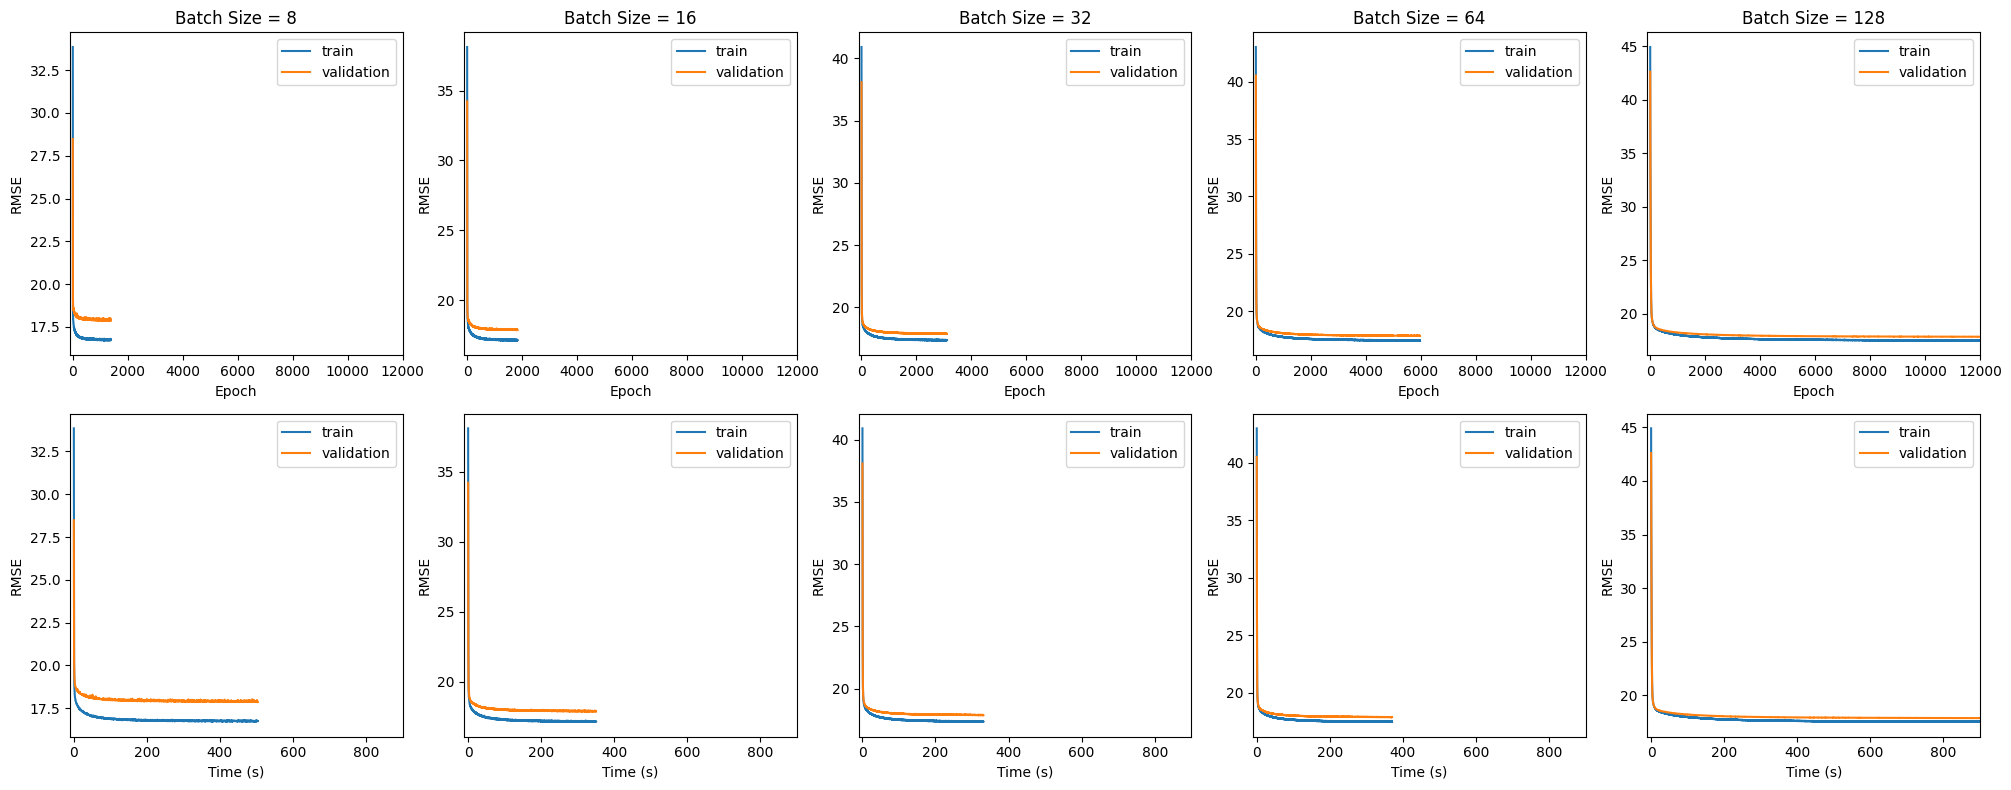

In [134]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
batch_sizes = list(data.keys())
batch_sizes.sort()

for i, batch_size in enumerate(batch_sizes):
    epoch_ax = axes[0][i]
    time_ax = axes[1][i]
    w, train_rmse_array, val_rmse_array, epoch_times = data[batch_size]
    epoch_ax.plot(range(1, len(train_rmse_array) + 1), train_rmse_array, label='train')
    epoch_ax.plot(range(1, len(val_rmse_array) + 1), val_rmse_array, label='validation')
    epoch_ax.title.set_text(f"Batch Size = {batch_size}")
    epoch_ax.set_xlabel("Epoch")
    epoch_ax.set_ylabel("RMSE")
    epoch_ax.set_xlim(left=-100, right=12000)
    epoch_ax.legend()

    time_ax.plot(epoch_times, train_rmse_array, label='train')
    time_ax.plot(epoch_times, val_rmse_array, label='validation')
    time_ax.set_xlabel("Time (s)")
    time_ax.set_ylabel("RMSE")
    time_ax.set_xlim(left=-10, right=900)
    time_ax.legend()

fig.tight_layout()
plt.show()
plt.close()
    

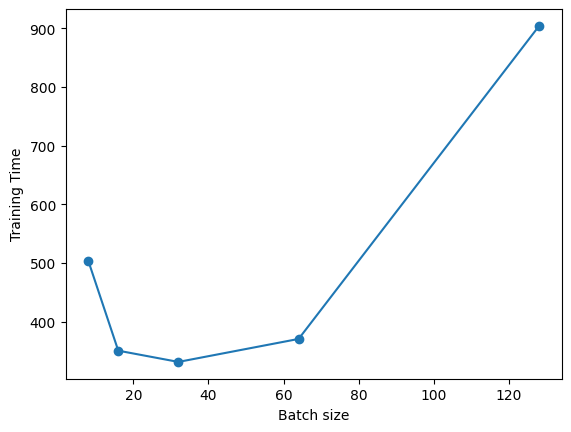

In [140]:
training_times = [data[batch_size][-1][-1] for batch_size in batch_sizes]

plt.plot(batch_sizes, training_times)
plt.scatter(batch_sizes, training_times)
plt.xlabel("Batch size")
plt.ylabel("Training Time (s)")
plt.show()
plt.close()

>>> Observations: 
* Overfitting was highest when the batch size was $8$ and decreased as batch size increased.
* However, as batch size increased, so did the number of epochs required until convergence. 
* The relationship between batch size and training time was somewhat unexpected as although it training time seemed to increase with batch size, 
the smallest batch size saw an unexpectedly high training time. 

## Part 5 - Gradient Descent Learning Rate [3 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batch sizes that do not converge with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[1]**

2. Select the best batch size based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD. 
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[1]**

In [ ]:
BATCH_SIZE = 256
LR = 0.05
w, train_rmse_array, val_rmse_array, epoch_times = mini_batch_train(
    X_train=X_train_numpy,
    X_val=X_val_numpy,
    y_train=y_train_numpy,
    y_val=y_val_numpy,
    batch_size=BATCH_SIZE,
    lr=LR,
    print_every=1
)

data[(BATCH_SIZE, LR)] = w, train_rmse_array, val_rmse_array, epoch_times



In [ ]:
BATCH_SIZE = 512
LR = 0.1
w, train_rmse_array, val_rmse_array, epoch_times = mini_batch_train(
    X_train=X_train_numpy,
    X_val=X_val_numpy,
    y_train=y_train_numpy,
    y_val=y_val_numpy,
    batch_size=BATCH_SIZE,
    lr=LR,
    print_every=1
)

data[(BATCH_SIZE, LR)] = w, train_rmse_array, val_rmse_array, epoch_times


In [ ]:
BATCH_SIZE = 1024
LR = 0.5
w, train_rmse_array, val_rmse_array, epoch_times = mini_batch_train(
    X_train=X_train_numpy,
    X_val=X_val_numpy,
    y_train=y_train_numpy,
    y_val=y_val_numpy,
    batch_size=BATCH_SIZE,
    lr=LR,
    print_every=1
)

data[(BATCH_SIZE, LR)] = w, train_rmse_array, val_rmse_array, epoch_times


In [162]:
with open('data', 'wb') as f:
    pickle.dump(data, f)

In [168]:
trials = list(data.keys())[-3:]
table_data = []
for trial in trials:
    train_time = data[trial][-1][-1]
    lr = trial[1]
    table_data.append([lr, train_time])
table = pd.DataFrame(index=[256, 512, 1024], columns=['lr', 'train_time (s)'], data=table_data)
table.index.name = 'batch_size'
table

lr  train_time
batch_size                  
256         0.05     187.378
512         0.10     126.518
1024        0.50      38.444

In [ ]:
learning_rates = [0.02 + 0.01 * i for i in range(10)]
BATCH_SIZE = 32 #fastest converging batch size

for lr in learning_rates:
    w, train_rmse_array, val_rmse_array, epoch_times = mini_batch_train(
        X_train=X_train_numpy,
        X_val=X_val_numpy,
        y_train=y_train_numpy,
        y_val=y_val_numpy,
        batch_size=BATCH_SIZE,
        lr=lr,
        print_every=10
    )

    data[(BATCH_SIZE, lr)] = w, train_rmse_array, val_rmse_array, epoch_times


with open('data', 'wb') as f:
    pickle.dump(data, f)

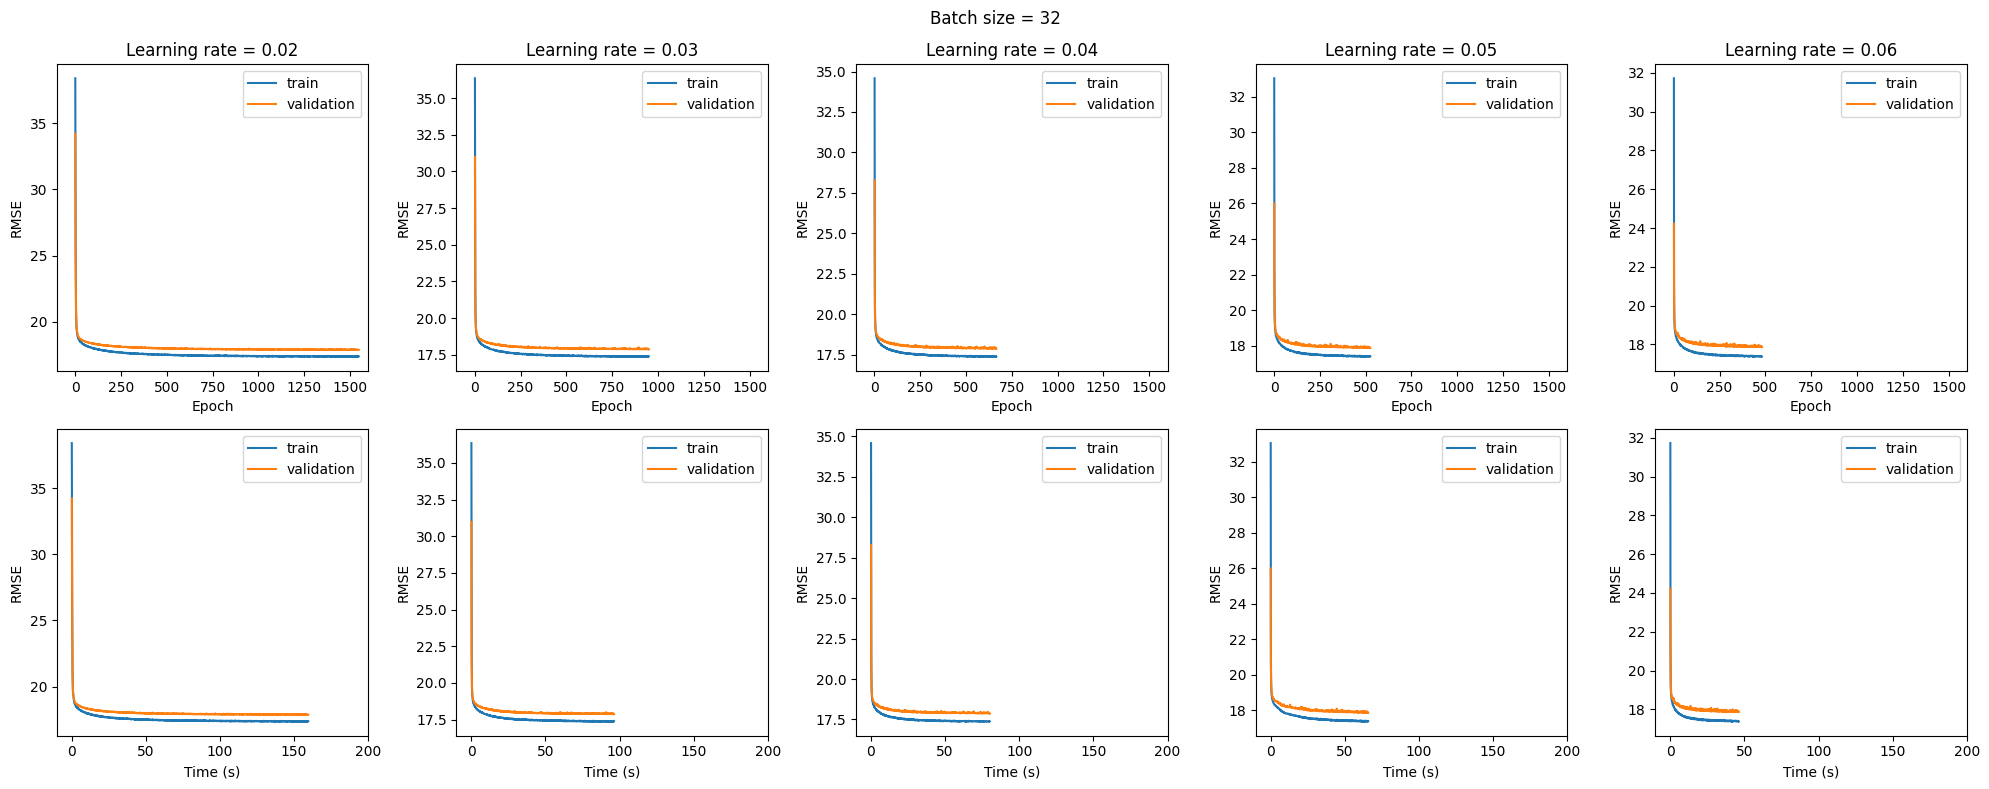

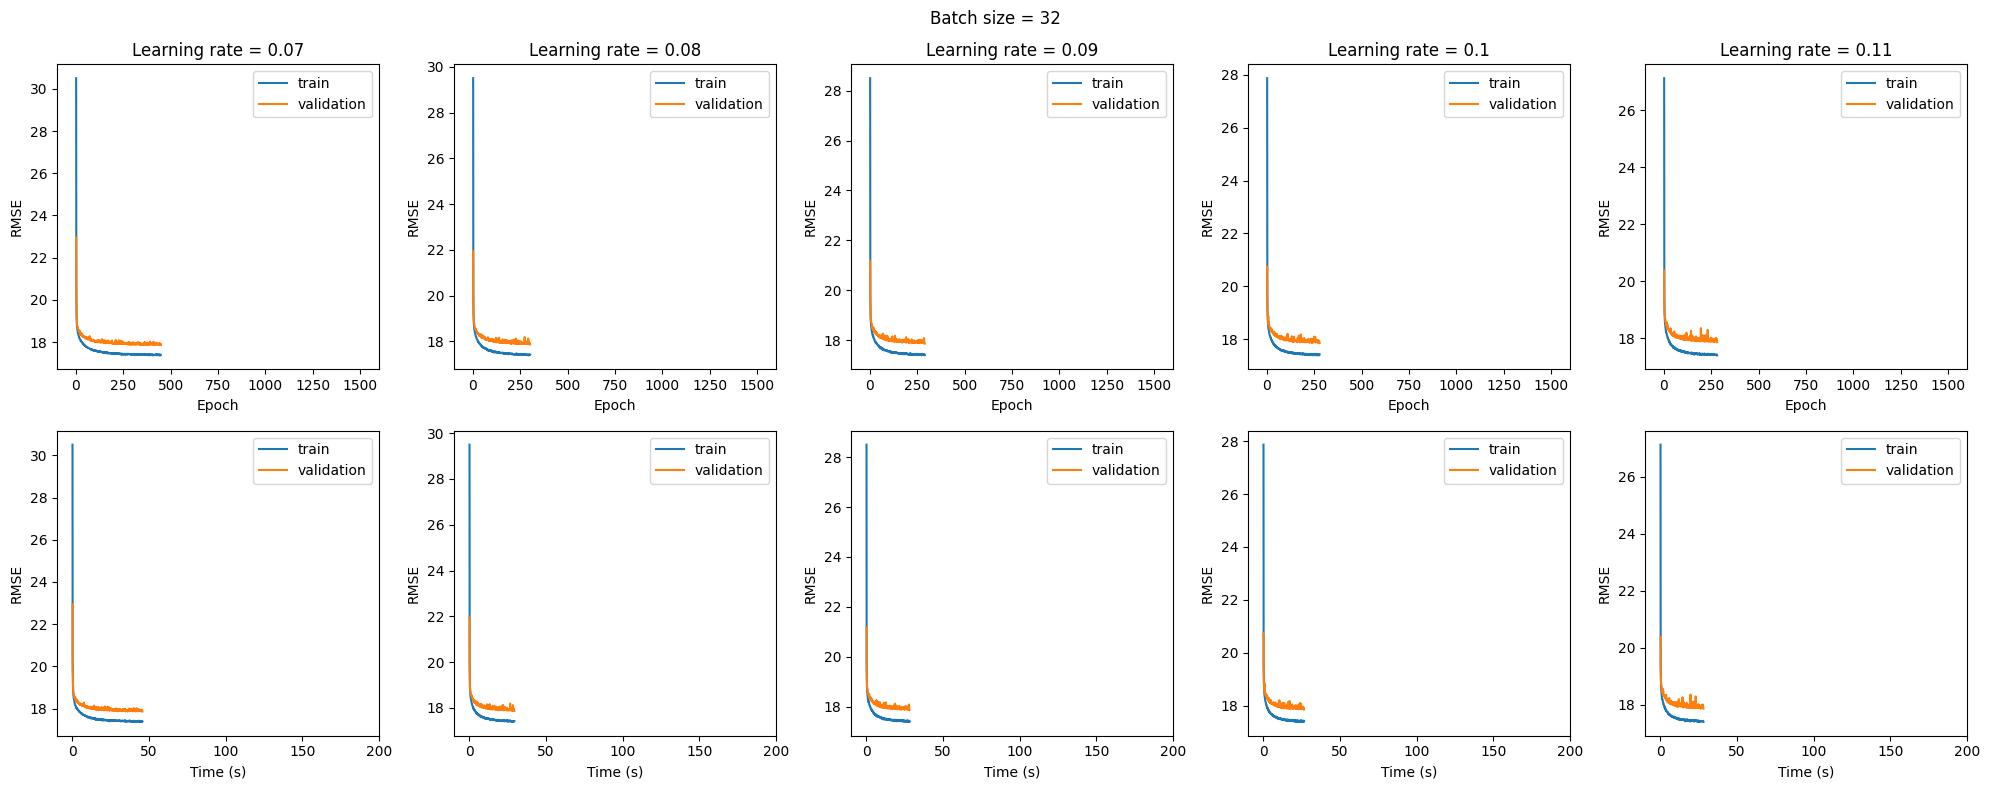

In [195]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
trials = list(data.keys())[-10:]

for i, (batch_size, lr) in enumerate(trials[:5]):
    epoch_ax = axes[0][i]
    time_ax = axes[1][i]
    w, train_rmse_array, val_rmse_array, epoch_times = data[(batch_size, lr)]
    epoch_ax.plot(range(1, len(train_rmse_array) + 1), train_rmse_array, label='train')
    epoch_ax.plot(range(1, len(val_rmse_array) + 1), val_rmse_array, label='validation')
    epoch_ax.title.set_text(f"Learning rate = {round(lr, 3)}")
    epoch_ax.set_xlabel("Epoch")
    epoch_ax.set_ylabel("RMSE")
    epoch_ax.set_xlim(left=-100, right=1600)
    epoch_ax.legend()

    time_ax.plot(epoch_times, train_rmse_array, label='train')
    time_ax.plot(epoch_times, val_rmse_array, label='validation')
    time_ax.set_xlabel("Time (s)")
    time_ax.set_ylabel("RMSE")
    time_ax.set_xlim(left=-10, right=200)
    time_ax.legend()

fig.suptitle("Batch size = 32")
fig.tight_layout()
plt.show()
plt.close()

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
for i, (batch_size, lr) in enumerate(trials[5:]):
    epoch_ax = axes[0][i]
    time_ax = axes[1][i]
    w, train_rmse_array, val_rmse_array, epoch_times = data[(batch_size, lr)]
    epoch_ax.plot(range(1, len(train_rmse_array) + 1), train_rmse_array, label='train')
    epoch_ax.plot(range(1, len(val_rmse_array) + 1), val_rmse_array, label='validation')
    epoch_ax.title.set_text(f"Learning rate = {round(lr, 3)}")
    epoch_ax.set_xlabel("Epoch")
    epoch_ax.set_ylabel("RMSE")
    epoch_ax.set_xlim(left=-100, right=1600)
    epoch_ax.legend()

    time_ax.plot(epoch_times, train_rmse_array, label='train')
    time_ax.plot(epoch_times, val_rmse_array, label='validation')
    time_ax.set_xlabel("Time (s)")
    time_ax.set_ylabel("RMSE")
    time_ax.set_xlim(left=-10, right=200)
    time_ax.legend()

fig.suptitle("Batch size = 32")
fig.tight_layout()
plt.show()
plt.close()

>>> Observations:
* The number of epochs required until convergence decreased as learning rate increased.
* Overfitting increases as learning rate increased.
* The validation curve became more unstable as learning rate increased.
* Training time until convergence decreased as learning rate increased. 

In [1]:
%%cmd
jupyter nbconvert --to html "C:\Users\nurei\Documents\MIE\APS1070\project\4\W23_APS1070_Project_4".ipynb --HTMLExporter.theme=dark

Microsoft Windows [Version 10.0.22621.1413]
(c) Microsoft Corporation. All rights reserved.

(venv) c:\Users\nurei\Documents\MIE\APS1070\project\4>jupyter nbconvert --to html "C:\Users\nurei\Documents\MIE\APS1070\project\4\W23_APS1070_Project_4".ipynb --HTMLExporter.theme=dark


[NbConvertApp] Converting notebook C:\Users\nurei\Documents\MIE\APS1070\project\4\W23_APS1070_Project_4.ipynb to html
[NbConvertApp] Writing 1099530 bytes to C:\Users\nurei\Documents\MIE\APS1070\project\4\W23_APS1070_Project_4.html



(venv) c:\Users\nurei\Documents\MIE\APS1070\project\4>Clink v0.4.9 [git:2fd2c2] Copyright (c) 2012-2016 Martin Ridgers
http://mridgers.github.io/clink



## Part 6 - Getting started with Github  [3 marks]

This final part of the project assignment is to be completed independently from Parts 1 - 5. In this part you will be completing some additional coding tasks using a different dataset and submitting your results on Github. To access this part of the assignment and upload your answers, you will need to use Github. Please complete the following step-by-step instructions:

 0. Create a Github account and install git for Windows or Mac: 
  * https://git-scm.com/download/win
  * https://git-scm.com/download/mac

 1. Open this link: https://classroom.github.com/a/ODb_vtN2 to create your assignment repository in GitHub. You should get a link similar to:
```
https://github.com/APS-1070-W23/project-4-*********
```
This your private repository to get this part questions and upload your answers. **Copy this link to the text box below to be graded for this part.**

 
 2. Open `Git Bash`, the app you downloaded in step `0`, and set your Email and username by:
```
git config --global user.email “<your-GitHub-email>”
git config --global user.name “<your-GitHub-username>”
```

 3. Create a folder for the course on your computer and `cd` to that. `cd` means `Change Directory`. For example, on a Windows machine, where I have a folder on "C:\aps1070":
 ```
cd c:aps1070
```
 4. Get your assignment by the link you got in step 1:
```
git clone https://github.com/APS-1070-W23/project-4-*********
```

 5. A new folder should be created in your directory similar to:
```
C:\aps1070\project-4-********
```
This folder has an `ipynb` notebook which you need to manually upload to colab and answer its questions. 

 6. After you finished working on this notebook, download the notebook from colab and move it to the directory in step 5.

 7. Replace the old notebook with the new one that has your answers. Make sure your completed notebook has the same name as the original notebook you downloaded. 

 8. To submit your work, follow: 
```
cd <your assignment folder>
git add W23_Project_4_git.ipynb
git commit -m “Final Submission”
git push 
```
If you have any problem with pushing your work on GitHub you can try one of following commands:
```
git push --force
or 
git push origin HEAD:main
```

 9. Make sure your submission is ready for grading. Open the private repository link in your browser and make sure you can see your final submission with your latest changes there. **Only you and the teaching team can open that link.**